## CONFIG

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
DB_FILE_PATH = "house_prices.db"

## READING DATABASE

In [3]:
data = {}
conn = sqlite3.connect(DB_FILE_PATH)
data["all"] = pd.read_sql_query("SELECT * FROM mieszkanka",conn)
conn.close()

In [4]:
data["all"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99170 entries, 0 to 99169
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           99170 non-null  int64  
 1   developer    99170 non-null  object 
 2   investment   99170 non-null  object 
 3   number       99170 non-null  object 
 4   area         99170 non-null  float64
 5   price        99170 non-null  int64  
 6   country      99160 non-null  object 
 7   voivodeship  99160 non-null  object 
 8   county       27478 non-null  object 
 9   city         96290 non-null  object 
 10  district     58707 non-null  object 
 11  lat          99170 non-null  float64
 12  lng          99170 non-null  float64
 13  floor        95730 non-null  float64
 14  floors       99170 non-null  int64  
 15  balcony      35211 non-null  float64
 16  loggia       6663 non-null   float64
 17  terrace      9250 non-null   float64
 18  garden       10019 non-null  float64
dtypes: f

In [5]:
data["all"].describe()

,id,area,price,lat,lng,floor,floors,balcony,loggia,terrace,garden
count,99170.000000,99170.000000,9.917000e+04,99170.000000,99170.000000,95730.000000,99170.000000,35211.000000,6663.000000,9250.000000,10019.000000
mean,49585.500000,58.439314,7.961183e+05,18.304330,51.523458,2.683004,1.082414,7.979922,6.844572,25.032791,79.108702
std,28628.057435,31.481649,6.705208e+05,4.232786,2.891869,2.744205,0.322050,7.281906,5.928909,30.332002,101.381851
min,1.000000,5.000000,2.100000e+05,-5.273033,36.323581,-1.000000,1.000000,0.440000,0.670000,1.000000,0.970000
25%,24793.250000,40.230000,5.000000e+05,17.021745,50.810471,1.000000,1.000000,4.490000,3.620000,7.580000,24.625000
50%,49585.500000,51.390000,6.600000e+05,19.029263,52.080934,2.000000,1.000000,5.830000,5.270000,15.000000,46.120000
75%,74377.750000,66.670000,8.800000e+05,20.640453,52.456515,4.000000,1.000000,9.020000,8.000000,29.510000,93.010000
max,99170.000000,1239.300000,2.591640e+07,23.514184,54.830454,40.000000,5.000000,189.870000,86.480000,403.960000,1313.910000


In [6]:
data["all"].value_counts("country")

country
PL    96036
ES     3124
Name: count, dtype: int64

## PREPARING DATASET

In [7]:
data["all"] = data["all"].query("country == 'PL'")
# dropping column with country, because we only want to analyse Polish market
data["all"] = data["all"].drop(columns=['country'])

In [8]:
data["all"].isnull().sum()

id                 0
developer          0
investment         0
number             0
area               0
price              0
voivodeship        0
county         68558
city            2803
district       37343
lat                0
lng                0
floor           3205
floors             0
balcony        60892
loggia         89392
terrace        89362
garden         86553
dtype: int64

In [9]:
# dropping column with county and district - later to be received from GUS API
data["all"] = data["all"].drop(columns=['county', 'district'])

In [10]:
data["all"] = data["all"][~data["all"]['city'].isna()]

In [11]:
data["all"].loc[:, 'balcony'] = data["all"]['balcony'].fillna(0)
data["all"].loc[:, 'loggia'] = data["all"]['loggia'].fillna(0)
data["all"].loc[:, 'terrace'] = data["all"]['terrace'].fillna(0)
data["all"].loc[:, 'garden'] = data["all"]['garden'].fillna(0)
data["all"].loc[:, 'floor'] = data["all"]['floor'].fillna(-1) # to distinguish it from floor 0



In [12]:
data["all"]['price_m2'] = data["all"]['price']/ data['all']['area']

In [13]:
data["all"]['is_commercial'] = data["all"]['number'].str.startswith('U')

In [14]:
data["all"].describe()

,id,area,price,lat,lng,floor,floors,balcony,loggia,terrace,garden,price_m2
count,93233.000000,93233.000000,9.323300e+04,93233.000000,93233.000000,93233.000000,93233.000000,93233.000000,93233.000000,93233.000000,93233.000000,93233.000000
mean,49577.007798,56.014762,7.429567e+05,18.985317,51.988230,2.628533,1.069428,2.939781,0.483560,1.160354,7.191349,13782.140294
std,28563.517981,26.734128,4.256041e+05,1.970037,1.388266,2.762055,0.299010,5.642625,2.326872,6.624174,35.644420,5255.657334
min,1.000000,5.000000,2.100000e+05,14.232837,49.281500,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,855.321552
25%,24734.000000,39.900000,5.000000e+05,17.064818,51.055766,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10314.262691
50%,49498.000000,50.140000,6.500000e+05,19.091438,52.117108,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12748.295286
75%,74375.000000,64.900000,8.500000e+05,20.673060,52.569699,4.000000,1.000000,4.700000,0.000000,0.000000,0.000000,15912.305516
max,99170.000000,1239.300000,2.065860e+07,23.514184,54.830454,35.000000,5.000000,138.620000,86.480000,403.960000,1313.910000,198000.000000


In [15]:
data["all"] = data["all"].rename(columns={"lng":"lat", "lat":"lng"})

## FIXING OUTLIERS

In [16]:
data["all"].sort_values('price_m2')

,id,developer,investment,number,area,price,voivodeship,city,lng,lat,floor,floors,balcony,loggia,terrace,garden,price_m2,is_commercial
25176,25177,ARD,Apartamenty na Chopina II etap,C.4.3,1239.30,1060000,kujawsko-pomorskie,Bydgoszcz,18.021742,53.124240,4.0,2,21.00,0.0,44.0,0.0,855.321552,False
47969,47970,Novdom Sp. z o.o.,Apartamenty Macadamia,18,227.94,640000,warmińsko-mazurskie,Olsztyn,20.480141,53.781898,5.0,1,31.45,3.7,0.0,0.0,2807.756427,False
81279,81280,Eldor Bud Sp. z o.o.,Osiedle Żeromskiego etap III,P,194.96,610000,mazowieckie,Tobolice,21.595880,53.046051,-1.0,2,0.00,0.0,0.0,0.0,3128.846943,False
8344,8345,Eldor Bud Sp. z o.o.,Osiedle Żeromskiego etap III,P,194.96,620000,mazowieckie,Tobolice,21.595880,53.046051,-1.0,2,0.00,0.0,0.0,0.0,3180.139516,False
36193,36194,Apartamenty Szczyrk Sp. z o.o.,Apartamenty Szczyrk,A18,74.30,260000,śląskie,Szczyrk,19.029234,49.718571,2.0,1,0.00,0.0,0.0,0.0,3499.327052,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70891,70892,Assethome – Przedstawiciel Dewelopera,The Sea Resort Międzyzdroje,B1-03,80.45,5730000,zachodniopomorskie,Międzyzdroje,14.443170,53.930185,1.0,1,0.00,0.0,0.0,0.0,71224.362958,False
86144,86145,Assethome – Przedstawiciel Dewelopera,The Sea Resort Międzyzdroje,A1-05,60.34,4380000,zachodniopomorskie,Międzyzdroje,14.443170,53.930185,1.0,1,0.00,0.0,0.0,0.0,72588.664236,False
23902,23903,Novdom Sp. z o.o.,Apartamenty Macadamia,32,35.57,2640000,warmińsko-mazurskie,Olsztyn,20.480141,53.781898,4.0,1,7.83,0.0,0.0,0.0,74219.848187,False
68677,68678,Matexi Polska Sp. z o.o.,Żelazna 54,U.00.02,184.16,20658600,mazowieckie,Warszawa,20.991590,52.233865,0.0,1,0.00,0.0,0.0,0.0,112177.454387,True


In [17]:
# manual fix
#data["all"].at[25177, "area"] /= 10
data["all"].at[29745, "area"] = 72.27
data["all"].at[68677, "price"] = 4984000
data["all"].at[23902, "price"] = 650000


In [18]:
data["all"]["price_m2"] = data["all"]["price"] / data["all"]["area"]

## GRAPHICAL REPRESENTATION

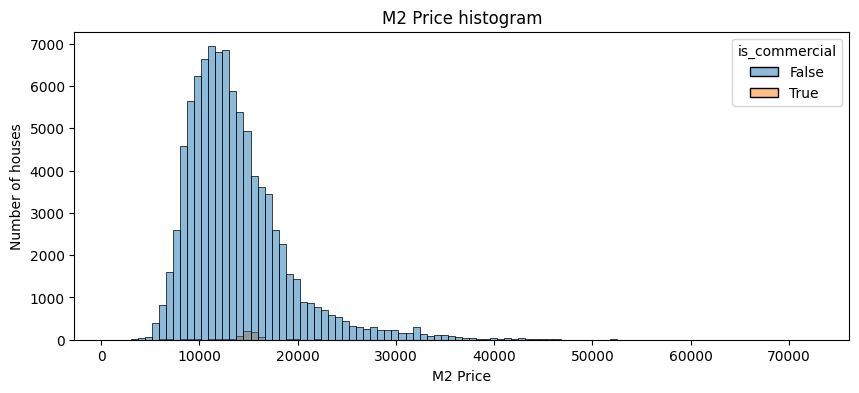

In [19]:
plt.figure(figsize=(10,4))
sns.histplot(data = data['all'],
             x='price_m2',
             bins = 100,
             hue = 'is_commercial')
plt.title("M2 Price histogram")
plt.xlabel("M2 Price")
plt.ylabel("Number of houses")
plt.show()

In [20]:
## counting outliers
display(data["all"][data["all"]["price_m2"] > 30_000].shape[0])
display(data["all"].shape[0])

1689

93233

In [21]:
mask = data["all"][data["all"]["price_m2"] > 30_000]
data["all"] = data["all"].drop(mask.index).reset_index(drop=True)
mask = data["all"][data["all"]["price_m2"] < 5_000]
data["all"] = data["all"].drop(mask.index).reset_index(drop=True)

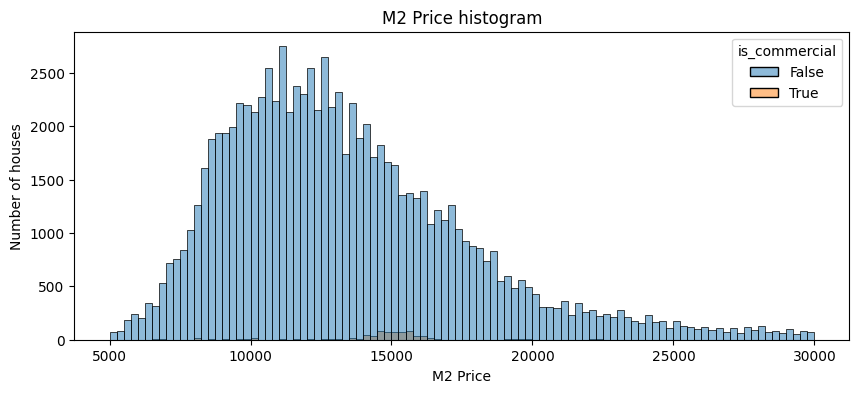

In [22]:
plt.figure(figsize=(10,4))
sns.histplot(data = data['all'],
             x='price_m2',
             bins = 100,
             hue = 'is_commercial')
plt.title("M2 Price histogram")
plt.xlabel("M2 Price")
plt.ylabel("Number of houses")
plt.show()

In [23]:
data['all'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91471 entries, 0 to 91470
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             91471 non-null  int64  
 1   developer      91471 non-null  object 
 2   investment     91471 non-null  object 
 3   number         91471 non-null  object 
 4   area           91471 non-null  float64
 5   price          91471 non-null  int64  
 6   voivodeship    91471 non-null  object 
 7   city           91471 non-null  object 
 8   lng            91471 non-null  float64
 9   lat            91471 non-null  float64
 10  floor          91471 non-null  float64
 11  floors         91471 non-null  int64  
 12  balcony        91471 non-null  float64
 13  loggia         91471 non-null  float64
 14  terrace        91471 non-null  float64
 15  garden         91471 non-null  float64
 16  price_m2       91471 non-null  float64
 17  is_commercial  91471 non-null  bool   
dtypes: boo

In [24]:
data["all"].loc[:,"is_detached"] = data['all']["floor"] == -1

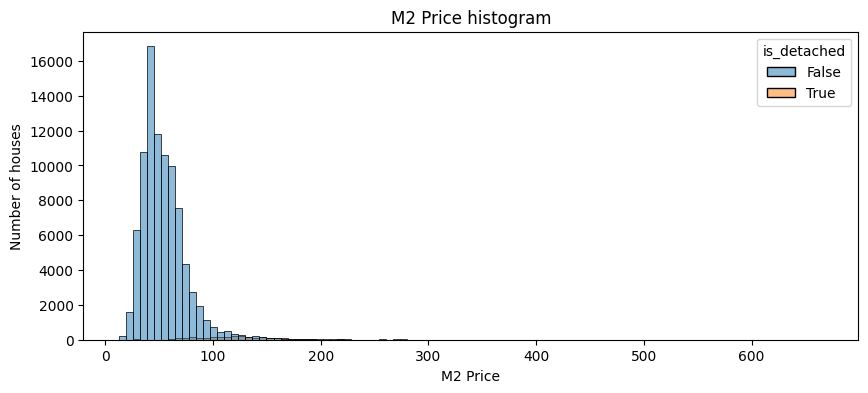

In [25]:
plt.figure(figsize=(10,4))
sns.histplot(data = data['all'],
             x='area',
             bins = 100,
             hue = 'is_detached')
plt.title("Area histogram")
plt.xlabel("M2 ")
plt.ylabel("Number of houses")
plt.show()

In [26]:
data["all"].sort_values("area").tail(10)

,id,developer,investment,number,area,price,voivodeship,city,lng,lat,floor,floors,balcony,loggia,terrace,garden,price_m2,is_commercial,is_detached
23254,25171,PROFBUD,Gaia Park,17,339.60,4240000,mazowieckie,Warszawa,21.110273,52.091203,0.0,2,6.9,9.4,41.7,0.0,12485.276796,False,False
23255,25172,PROFBUD,Gaia Park,18,339.60,4240000,mazowieckie,Warszawa,21.110273,52.091203,0.0,2,6.9,9.4,41.7,0.0,12485.276796,False,False
18371,19964,PROFBUD,Gaia Park,26,339.60,4440000,mazowieckie,Warszawa,21.110273,52.091203,0.0,2,6.9,9.4,41.7,0.0,13074.204947,False,False
57042,61556,modernBau Sp. z o.o.,Willa Fiore,1,346.43,6960000,mazowieckie,Warszawa,20.965170,52.276940,0.0,1,0.0,0.0,0.0,0.0,20090.638801,False,False
13846,15105,ABM Deweloper,Nowe Sady 85,U1,354.57,3510000,łódzkie,Łódź,19.433270,51.735820,0.0,1,0.0,0.0,0.0,0.0,9899.314663,True,False
37162,40437,Revisit Home,Słoneczne Tarasy,U2,358.40,4630000,łódzkie,Łódź,19.462379,51.776798,0.0,1,0.0,0.0,0.0,0.0,12918.526786,True,False
27929,30439,Działyńskich Sp. z o.o.,Działyńskich 6,0.4,364.27,5570000,wielkopolskie,Poznań,16.924910,52.411586,0.0,1,0.0,0.0,0.0,0.0,15290.855684,False,False
55760,60212,Marvipol Development,Central Park Ursynów,U05,415.17,2780000,mazowieckie,Warszawa,20.991935,52.164404,0.0,2,0.0,0.0,0.0,0.0,6696.052220,True,False
62399,67538,Resteks Dom Sp. z o.o.,Kamienica Zamkowa,UE_02,431.33,2810000,pomorskie,Tczew,18.802492,54.090123,0.0,1,0.0,0.0,0.0,0.0,6514.733499,True,False
66156,71587,LV DEVELOPMENT,Apartamenty Chorzów,L3,666.28,6600000,śląskie,Chorzów,18.933729,50.302971,0.0,1,0.0,0.0,0.0,0.0,9905.745332,False,False


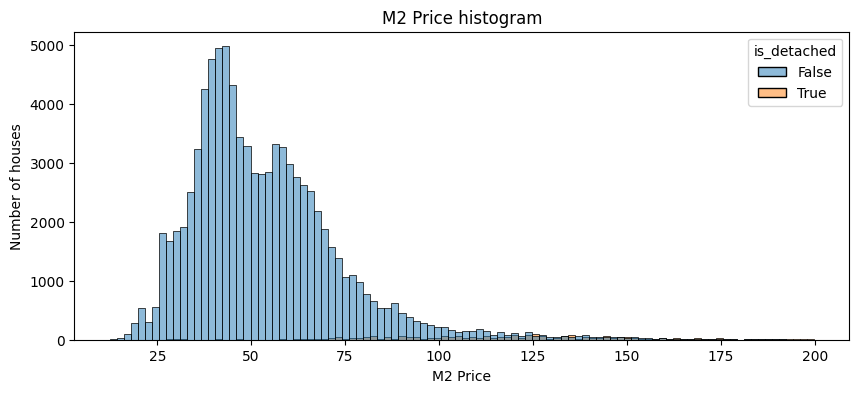

In [27]:
plt.figure(figsize=(10,4))
sns.histplot(data = data['all'][data['all']['area'] <=200],
             x='area',
             bins = 100,
             hue = 'is_detached')
plt.title("Area histogram")
plt.xlabel("M2")
plt.ylabel("Number of houses")
plt.show()

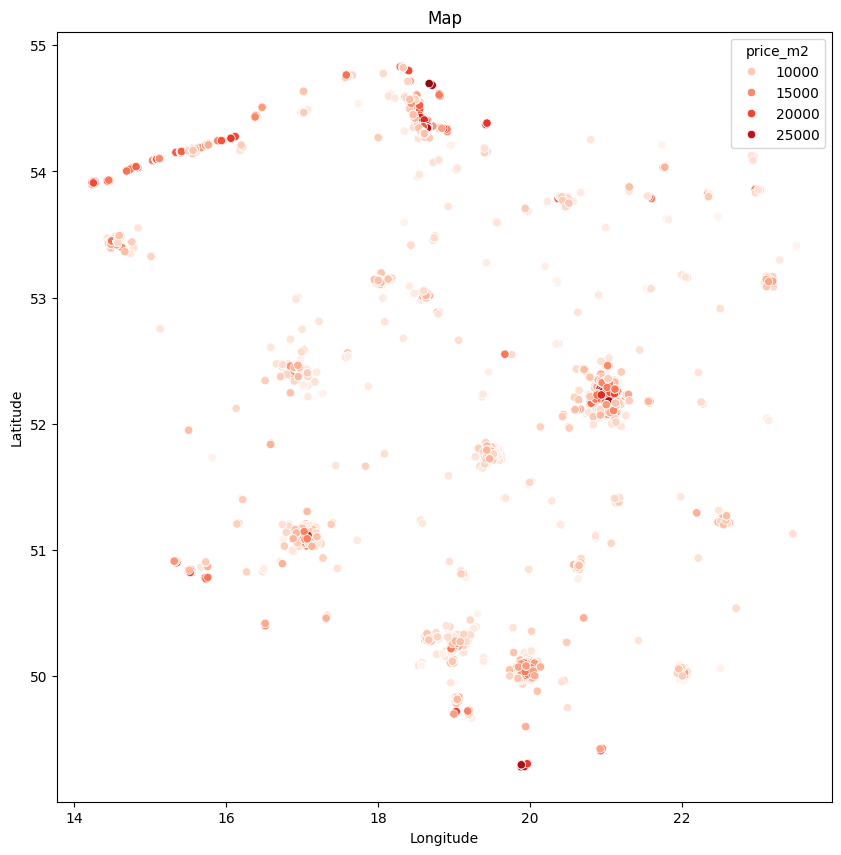

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = data['all'],
             x='lng',
             y='lat',
             palette = "Reds",
             hue = 'price_m2')
plt.title("Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [35]:
data["all"].to_parquet("prices_v1.parquet", index = False)